In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt

# Математика

## Предел и непрерывность функции

**Опр** Число $a$ будем называть пределом последовательности $x_{i}$  если: 
\begin{equation*}
    \forall \varepsilon > 0  \, \exists  \, N : \, \forall n > N \, |x_{x} - a| \leq \varepsilon
\end{equation*}


**Опр** Функцию $f(x)$ будем называть непрерывной в точке $x_{0}$, если предел $f(x)$ существует в этой точке и равен $f(x_{0})$:
\begin{equation*}
    \lim_{x\to x_{0}}f(x) = f(\lim_{x\to x_{0}})=f(x_{0})
\end{equation*}

P.S. Определение выше легко понять: *РЕАЛЬНОЕ значение функции в точке $x_{0}$ должно совпадать с ОЖИДАЕМЫМ значением функции при приближении к этой точке* 

**Опр** Функцию $f(x)$ будем называть непрерывной, если она определена в любой точке из области определения функции $D(f)$.



# Производная функции

**Опр** Пределом функции $f(x)$ в точке $a$ называется предел приращения функции к приращению аргумента при стремлении приращения аргумента к 0:

\begin{equation*}
    f'(x) = \lim_{ \Delta x\to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
\end{equation*}

Геометрический смысл производной --- тангенс угла наклона касательной к функции $f(x)$ в заданной точке, то есть уравнение касательной в функции $f(x)$ в точке $a$: $y = f'(a)(x - a) + f(a)$

**Опр** Гладкие функции --- функции с непрерывной производной.

Это значит что производная резко не меняет свой знак, и у функции нет изломов.

**Теор** Необходимое условие экстремума функции $f(x)$ в точке $a$: производная функции равна нулю в этой точке, те $f'(a) = 0$.

**Теор** Достаточное условие экстремума функции $f(x)$ в точке $a$: если выполнено необходимое условие экстремума функции в этой точке и 
1. $f''(x) < 0 $ --- функция 


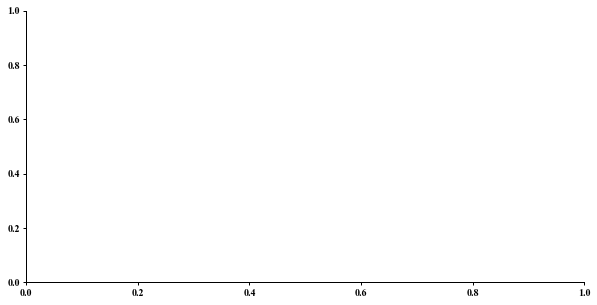

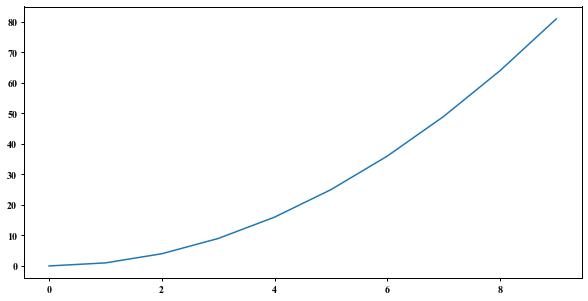

In [2]:
%run ./plot.py